## Plotting unitary Fermi gas quantities
Plotting quantities using tabulated data and code from Tilman Enss

In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
sys.path.append(str(Path(os.getcwd()).parent))

### Contact density
From Enss, Haussmann, Zwerger 2011?

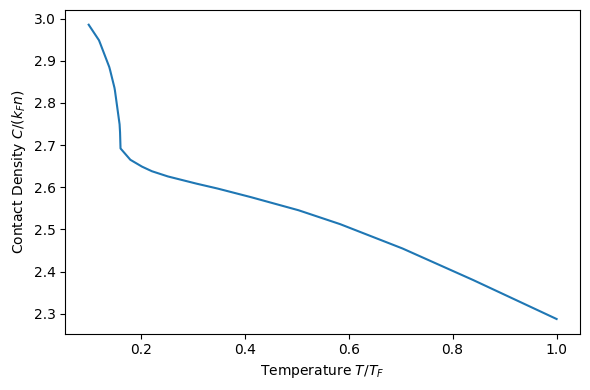

In [2]:
from amo.luttinger_ward_calculations import contact_density

ToTFs = np.linspace(0.1, 1.0, 1000)

xlabel = r'Temperature $T/T_F$'
ylabel = r'Contact Density $C/(k_F n)$'

fig, ax = plt.subplots(figsize=(6,4))

ax.set(xlabel=xlabel, ylabel=ylabel)
ax.plot(ToTFs, contact_density(ToTFs))

fig.tight_layout()

plt.show()


### Trap averaged-contact

In [3]:
from amo.unitary_fermi_gas import trap_averaged_contact, trap_averaged_contact_slope
from amo.luttinger_ward_calculations import scale_susceptibility
import pandas as pd

file = 'luttward-thermodyn.txt'
df = pd.read_csv(os.path.join('..', 'data', file), skiprows=4, sep=' ')

df = df[df['T/T_F'] < 1.2]
df = df[df['T/T_F'] > 0.18]

ToTFs = df['T/T_F']

# ToTFs = np.linspace(0.1, 1.0, 50)
EF = 10e3  # Hz
barnu = 300  # Hz

Cs = np.array([trap_averaged_contact(*arg) for arg in zip(ToTFs, 
        EF * np.ones_like(ToTFs), barnu * np.ones_like(ToTFs))])

file = 'sumrule-bulk-ufg.txt'
df = pd.read_csv(os.path.join('..', 'data', file), skiprows=3, sep=' ')
df_label = 'S(T)(k_Fa)^2/(n*EF)'

df = df[df['T/T_F'] < 1.2]
df = df[df['T/T_F'] > 0.18]

Ss = df[df_label]

Cslopes = np.array([trap_averaged_contact_slope(*arg) for arg in zip(ToTFs, 
        EF * np.ones_like(ToTFs), barnu * np.ones_like(ToTFs))])


f:\GitHub\ChiPyLab\amo\unitary_fermi_gas.py:35: RuntimeWarning: divide by zero encountered in scalar divide
  return (4*pi)/((3*pi**2)* eos_ufg(betamu))**(2/3)
f:\GitHub\ChiPyLab\amo\unitary_fermi_gas.py:35: RuntimeWarning: divide by zero encountered in scalar divide
  return (4*pi)/((3*pi**2)* eos_ufg(betamu))**(2/3)


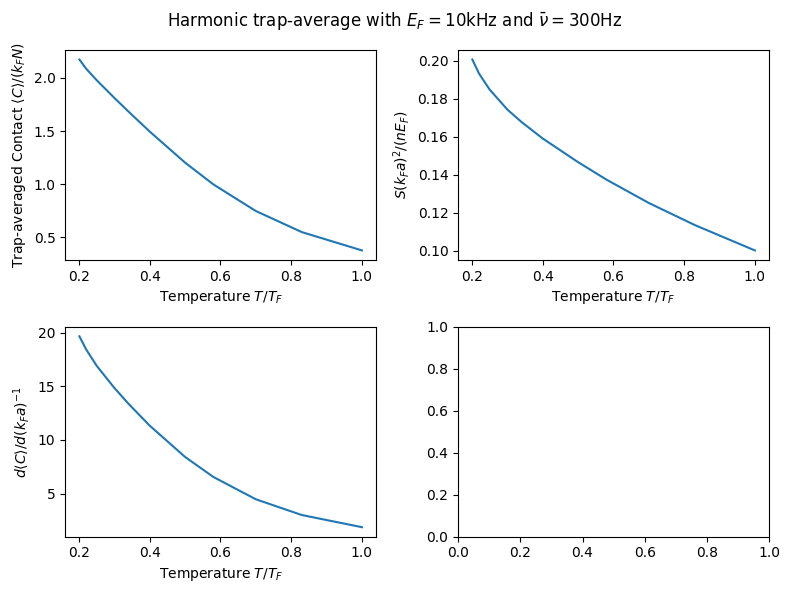

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axs = axes.flatten()
fig.suptitle(r"Harmonic trap-average with $E_F=$" + f"{EF/1e3:.0f}kHz" \
             + r" and $\bar\nu=$" + f"{barnu:.0f}Hz")

## Trap-averaged contact
ax = axs[0]
xlabel = r'Temperature $T/T_F$'
ylabel = r'Trap-averaged Contact $\langle C \rangle/(k_F N)$'

ax.set(xlabel=xlabel, ylabel=ylabel)
ax.plot(ToTFs, Cs)


## Scale susceptibility
ax = axs[1]
ylabel = r'$S(k_F a)^2/(n E_F)$'

ax.set(xlabel=xlabel, ylabel=ylabel)
ax.plot(ToTFs, Ss)


## Trap-averaged contact slope
ax = axs[2]
ylabel = r'$d\langle C \rangle/d(k_F a)^{-1}$'

ax.set(xlabel=xlabel, ylabel=ylabel)
ax.plot(ToTFs, Cslopes)


fig.tight_layout()

plt.show()

In [5]:
ToTFs = np.linspace(0.2, 1.2, 29)

Cs = np.array([trap_averaged_contact(*arg) for arg in zip(ToTFs, 
        EF * np.ones_like(ToTFs), barnu * np.ones_like(ToTFs))])


In [6]:
Cs

array([2.1783244 , 2.02855915, 1.90539411, 1.78810748, 1.67342239,
       1.56085269, 1.45088512, 1.34443262, 1.24180172, 1.14444157,
       1.05270978, 0.96701767, 0.88750127, 0.81417138, 0.74688656,
       0.68537897, 0.62934843, 0.57842509, 0.53227651, 0.49047896,
       0.45264838, 0.41839089, 0.38739359, 0.35932629, 0.33388573,
       0.31080807, 0.28985089, 0.27077148, 0.25339308])

In [7]:
Cs

array([2.1783244 , 2.02855915, 1.90539411, 1.78810748, 1.67342239,
       1.56085269, 1.45088512, 1.34443262, 1.24180172, 1.14444157,
       1.05270978, 0.96701767, 0.88750127, 0.81417138, 0.74688656,
       0.68537897, 0.62934843, 0.57842509, 0.53227651, 0.49047896,
       0.45264838, 0.41839089, 0.38739359, 0.35932629, 0.33388573,
       0.31080807, 0.28985089, 0.27077148, 0.25339308])

In [8]:
2.178*np.sqrt(2)


np.float64(3.0801571388486013)